# Astronomy 499 Winter

## Table of Contents
### Initialization
### Chapter 1: Data Analysis
> #### 1.1 Signal to Noise Ratio
> #### 1.2 Chi-Squared
### Chapter 2: Wacky Light Curves
> #### 2.1 Close Chi-Squared
> #### 2.2 Short Light Curves (length < 150)
> > Plot DRW and DHO LC with similar logLbol and SNR
<br>Identify NaN Chi-sq Fits
> #### 2.3 Shortest Light Curves (length < 20)
> #### 2.4 Low SNR
### Chapter 3: Case for NaN's
> #### 3.1 Identifying NaN Chi-sq Fits
> #### 3.2 Case Study: BAT ID 7 (NaN Fit)
> #### 3.3 Case Study: BAT ID 542 (NaN Fit)
> #### 3.4 Case Study: BAT ID 739 (Real Fit)
> #### 3.5 Case Study: BAT ID 841 (Real Fit)
> #### 3.5 Deeper Analysis
### Appendix 
> #### A: Functions

- - -
- - -

## Initialization
Imports and core variables needed to use workbook

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read in new dataframe
agn_fit_data = pd.read_csv('agn_dataframe.csv')
#pd.read_pickle()

# mask EXCLUDING LC with fewer datapoints than threshold
min_datapoints = 20
short_lc_mask = agn_fit_data['LC Length'] > min_datapoints

# TODO: add nan_fits_mask

- - -
- - -

## Chapter 1: Data Analysis
In this section, we delve into the AGN dataframe and search for any significant trends.

### 1.1 Signal to Noise Ratio
Here we wish to find the signal to noise ratio (SNR) to compare it against various other datapoints. We calculate the SNR for a specific AGN by dividing the average of the magnitude by mag error.

In [60]:
# read data frame
agn_fit_data = pd.read_csv("AGN_ZTF_lcs_fits_BASS_data.csv")
#agn_fit_data

# note: lines with bad data 214,250,278,281,295,296,300,302,308,309,315,320,321
# because data was formated as '1, 2, 3, ... 8, 9, 10'

In [181]:
# calculate snr for each row in the data frame
data_points = []
snr = []

# index each AGN in agn_fit_data and calculate SNR
for index, row in agn_fit_data.iterrows():
    # get data from row
    y = row['Magnitudes']
    err = row['Mag Errors']
    
    # convert into float lists
    y = convert_to_float_list(y)
    err = convert_to_float_list(err)
    
    # mean of mag and err
    if y != flag:
        mean_y = np.mean(y)
        mean_err = np.mean(err)
        snr_row = mean_y / mean_err
        length = len(y)
    else:
        snr_row = np.sqrt(-1)
        length = np.sqrt(-1)
    
    # save data
    data_points.append(length)
    snr.append(snr_row)

# add snr and light curve lengths to dataframe
agn_fit_data['SNR'] = snr
agn_fit_data['LC Length'] = data_points

# save to new .csv file
agn_fit_data.to_csv('agn_dataframe.csv')

<ipython-input-181-7787c8999220>:22: RuntimeWarning: invalid value encountered in sqrt
  snr_row = np.sqrt(-1)
<ipython-input-181-7787c8999220>:23: RuntimeWarning: invalid value encountered in sqrt
  length = np.sqrt(-1)


#### Plot SNR Compared To Other Points

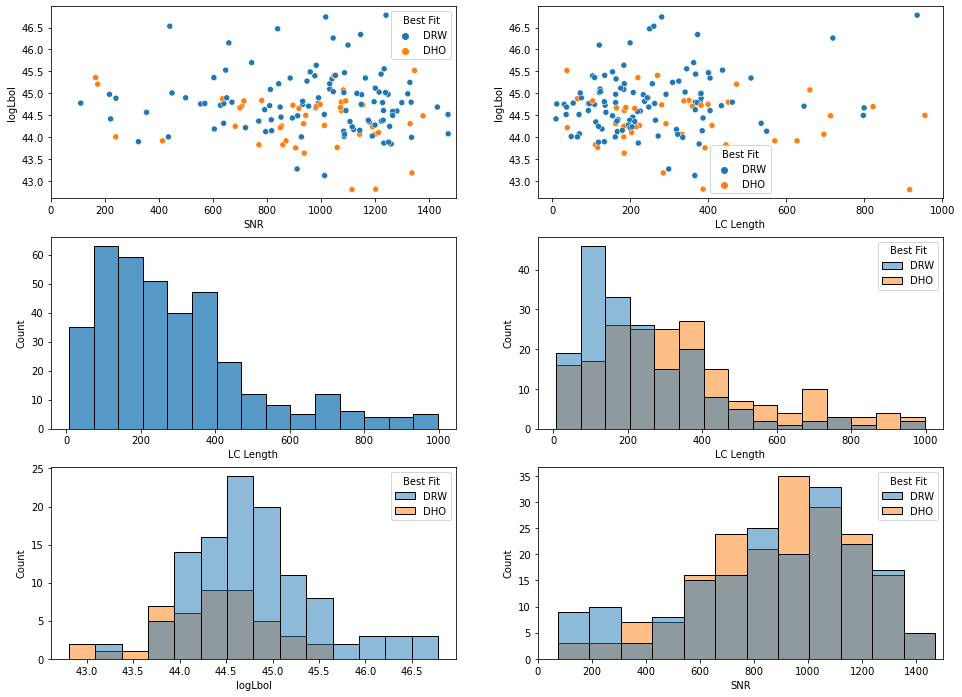

In [129]:
fig, axs = plt.subplots(3, 2, figsize=(16, 12))

#######
# row 0
#######
row = 0

# SNR vs LBol
sns.scatterplot(data=agn_fit_data, x='SNR', y ='logLbol', hue='Best Fit', ax=axs[row,0])
axs[row, 0].set_xlim(0, 1500) 
# note: there are some outliers

# LC Length vs LBol
sns.scatterplot(data=agn_fit_data, x='LC Length', y ='logLbol', hue='Best Fit', ax=axs[row,1])

#######
# row 1
#######
row += 1

# histogram of LC Length
sns.histplot(data=agn_fit_data, x='LC Length', ax=axs[row,0])

# histogram of LC Length for best fit
sns.histplot(data=agn_fit_data, x='LC Length', hue='Best Fit', ax=axs[row,1])

#######
# row 2
#######
row += 1

# histogram of LBol for best fit
sns.histplot(data=agn_fit_data, x='logLbol', hue='Best Fit', ax=axs[row,0])

# histogram of SNR for best fit
sns.histplot(data=agn_fit_data, x='SNR', hue='Best Fit', ax=axs[row,1])
axs[row, 1].set_xlim(0, 1500) 
# note: there are some outliers

plt.savefig('plots_bad.png')
plt.show()

### 1.2 Chi-Squared
Here we plot the chi-squared for both DRW and DHO against LBol, DRW/DHO fits, SNR, and anything else of value.

#### Histograms

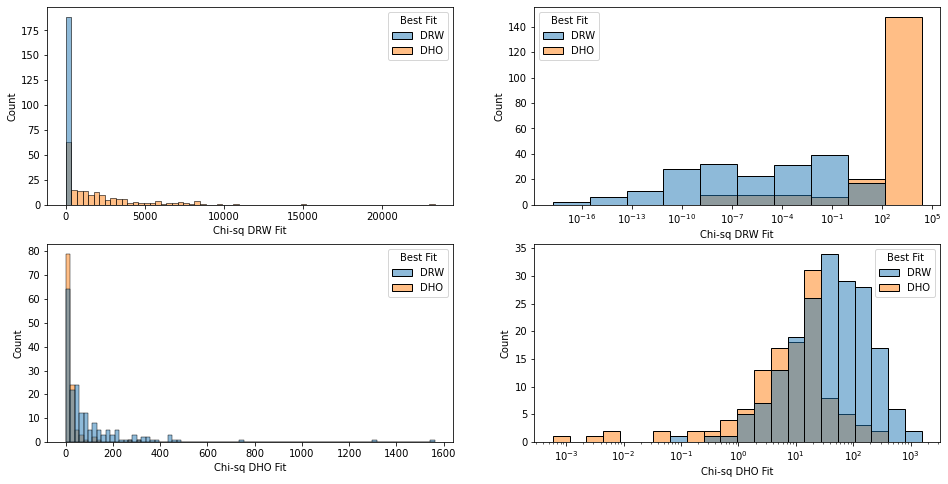

In [204]:
# histograms of chi-squared
fig, axs = plt.subplots(2, 2, figsize=(16, 8))

#######
# row 0
#######
row = 0

# histogram of chi-squared (DRW)
sns.histplot(data=agn_fit_data, x='Chi-sq DRW Fit', hue='Best Fit', ax=axs[row,0])

# histogram of chi-squared (DRW) (scaled logarithmically)
sns.histplot(data=agn_fit_data, x='Chi-sq DRW Fit', hue='Best Fit', log_scale=True, ax=axs[row,1])
axs[row, 1].set(xscale='log')

#######
# row 1
#######
row +=1

# histogram of chi-squared (DHO)
sns.histplot(data=agn_fit_data, x='Chi-sq DHO Fit', hue='Best Fit', ax=axs[row,0])

# histogram of chi-squared (DHO) (scaled logarithmically)
sns.histplot(data=agn_fit_data, x='Chi-sq DHO Fit', hue='Best Fit', log_scale=True, ax=axs[row,1])
axs[row, 1].set(xscale='log')

plt.show()

#### Comparing Chi-Squared of DRW and DHO

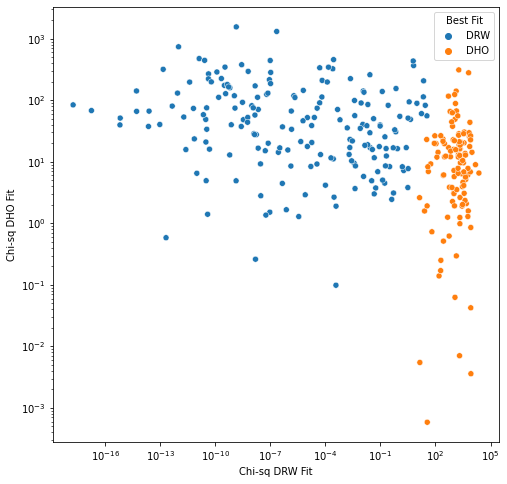

In [203]:
# chi-squared (DRW vs chi-squared (DHO)
fig = plt.figure(figsize=(8, 8))
fig.add_subplot(xscale='log', yscale='log')
sns.scatterplot(data=agn_fit_data, x='Chi-sq DRW Fit', y='Chi-sq DHO Fit', hue='Best Fit')
plt.show()

#### Chi-Sqared vs. logLbol

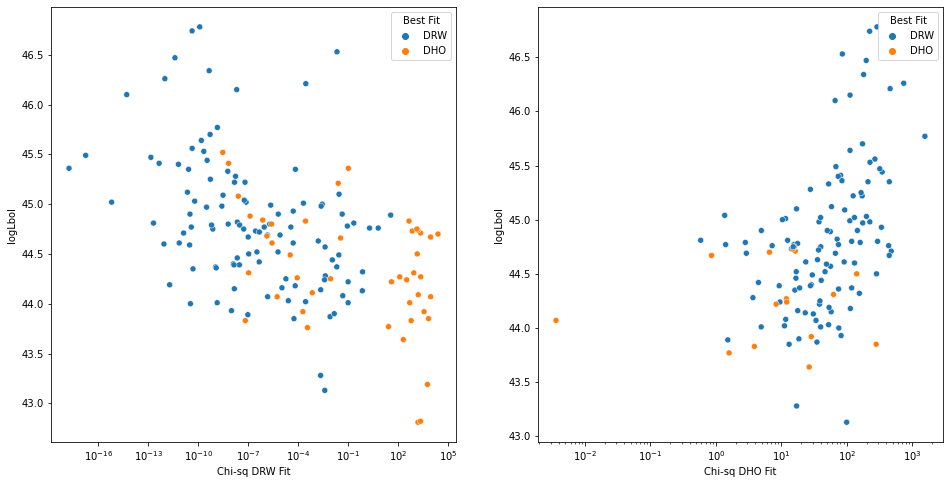

In [39]:
# scatter plots of chi-squared against other LogBol
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# chi-squared (DRW) vs LBol (scaled logarithmically)
sns.scatterplot(data=agn_fit_data, x='Chi-sq DRW Fit', y ='logLbol', hue='Best Fit', ax=axs[0])
axs[0].set(xscale='log')

# chi-squared (DHO) vs LBol (scaled logarithmically)
sns.scatterplot(data=agn_fit_data, x='Chi-sq DHO Fit', y ='logLbol', hue='Best Fit', ax=axs[1])
axs[1].set(xscale='log')

plt.show()

#### Chi-Squared vs. SNR

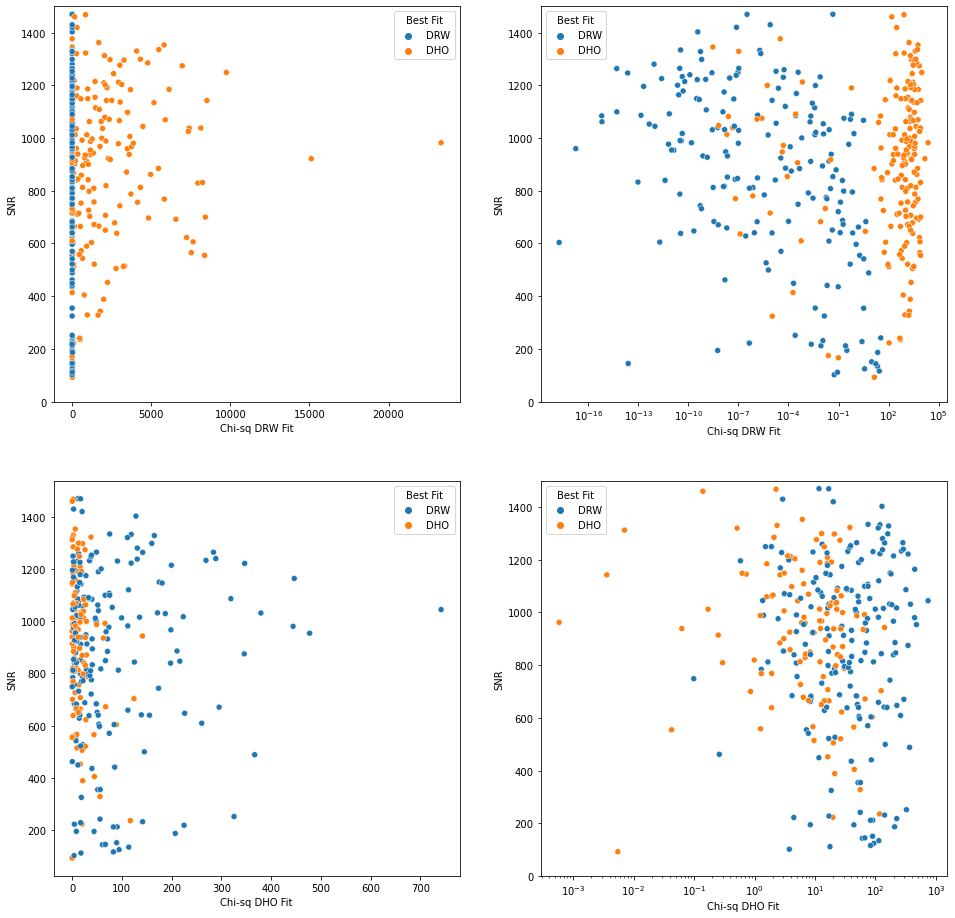

In [40]:
# scatter plots of chi-squared against SNR
fig, axs = plt.subplots(2, 2, figsize=(16, 16))

#######
# row 0
#######
row = 0

# chi-squared (DRW) vs SNR
sns.scatterplot(data=agn_fit_data, x='Chi-sq DRW Fit', y ='SNR', hue='Best Fit', ax=axs[row,0])
axs[row, 0].set_ylim(0, 1500) 

# chi-squared (DRW) vs SNR (scaled logarithmically)
sns.scatterplot(data=agn_fit_data, x='Chi-sq DRW Fit', y ='SNR', hue='Best Fit', ax=axs[row,1])
axs[row, 1].set_ylim(0, 1500) 
axs[row, 1].set(xscale='log')

#######
# row 1
#######
row += 1

# chi-squared (DHO) vs SNR
sns.scatterplot(data=agn_fit_data, x='Chi-sq DHO Fit', y ='SNR', hue='Best Fit', ax=axs[row,0])

# chi-squared (DHO) vs SNR (scaled logarithmically)
sns.scatterplot(data=agn_fit_data, x='Chi-sq DHO Fit', y ='SNR', hue='Best Fit', ax=axs[row,1])
axs[row, 1].set_ylim(0, 1500) 
axs[row, 1].set(xscale='log')

plt.show()

- - -
- - - 

## Chapter 2: Wacky Light Curves
Looking at light curves with very short Lengths or values that don't quite make sense

### 2.1 Close Chi-Squared
Identify and plot light curves whose chi-squared value for DRW and DHO are similar

#### Identify Close Fit(s)

In [5]:
# acceptable percentage of similarity between chi-squared
sig_figs = 1

# grab data from each row
for index, row in agn_fit_data.iterrows():
    chisq_drw = row['Chi-sq DRW Fit']
    chisq_dho = row['Chi-sq DHO Fit']

    try:
        np.testing.assert_approx_equal(chisq_drw, chisq_dho, significant=sig_figs)
        print(str(index) + ' ' + row['Best Fit'] + ' ' + str(chisq_drw) + ' ' + str(chisq_dho))
    except AssertionError:
        continue

199 DRW 3.1188345773522705 3.8199583364915353


#### Plot Close Fit(s)

BAT ID = 582
LC Length = 146.0
Best Fit = DRW
logLbol = nan
SNR = 1067.272575820202


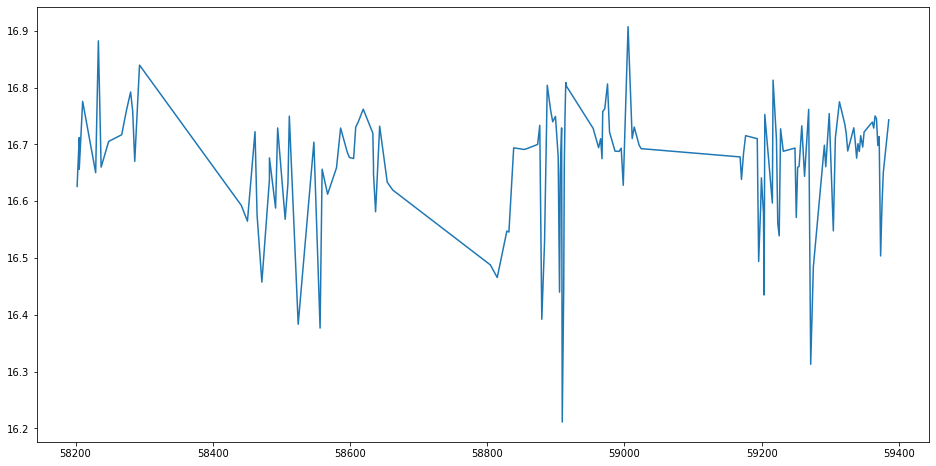

In [30]:
index = 199
row = agn_fit_data.iloc[index]

# grab light curve data
times = convert_to_float_list(row['Times (MJD)'])
y = convert_to_float_list(row['Magnitudes'])

# check if lists are good
if y == flag or times == flag:
    raise Exception('Magnitude or Times are not in a valid format')

fig = plt.figure(figsize=(16, 8))
plt.plot(times, y)

print('BAT ID = ' + str(row['BAT ID']))
print('LC Length = ' + str(row['LC Length']))
print('Best Fit = ' + str(row['Best Fit']))
print('logLbol = ' + str(row['logLbol']))
print('SNR = ' + str(row['SNR']))

plt.show()

### 2.2 Short Light Curves
Light curves of length < 150

#### Create Dataframe of Short Light Curves

In [4]:
# dataframe of short light curves to look at
short_agn_curves = get_curves_of_max_value(agn_fit_data, 'LC Length', 150)
len(short_agn_curves)

101

#### Histograms of short_agn_curves

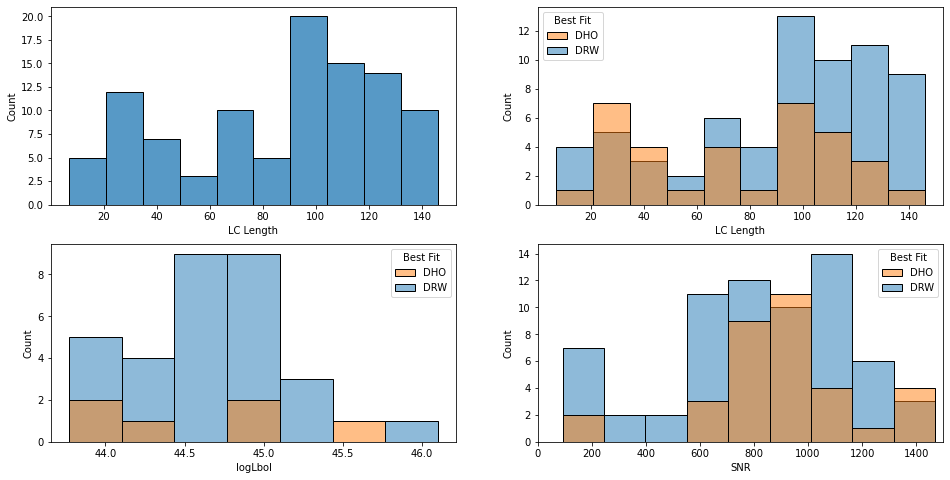

In [43]:
# light curves of length < 150
fig, axs = plt.subplots(2, 2, figsize=(16, 8))

num_bins = 10

#######
# row 0
#######
row = 0

# histogram of LC Length
sns.histplot(data=short_agn_curves, x='LC Length', bins=num_bins, ax=axs[row,0])

# histogram of LC Length for best fit
sns.histplot(data=short_agn_curves, x='LC Length', hue='Best Fit', palette=['C1', 'C0'], bins=num_bins, ax=axs[row,1])

#######
# row 1
#######
row += 1

# histogram of LBol for best fit
sns.histplot(data=short_agn_curves, x='logLbol', hue='Best Fit', palette=['C1', 'C0'], ax=axs[row,0])

# histogram of SNR for best fit
sns.histplot(data=short_agn_curves, x='SNR', hue='Best Fit', palette=['C1', 'C0'], ax=axs[row,1])
axs[row, 1].set_xlim(0, 1500) 
# note: there are some outliers

plt.show()

#### Scatter Plots of short_agn_curves

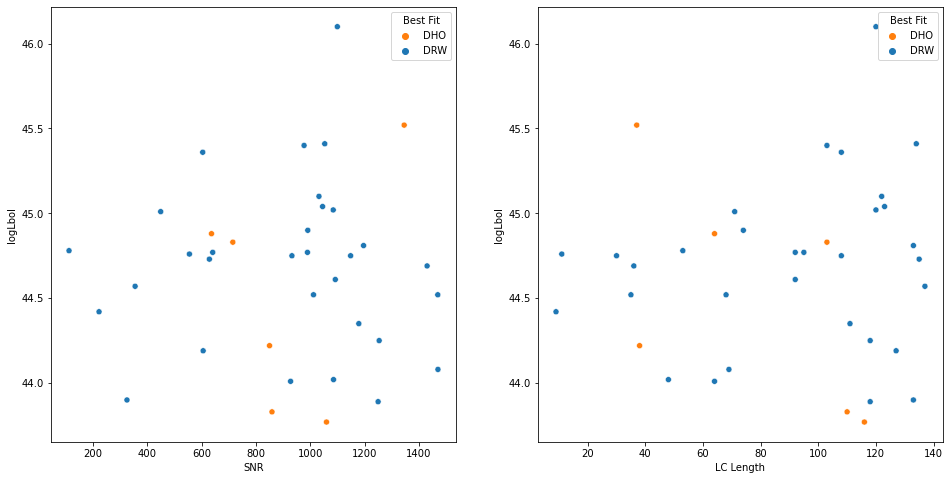

In [117]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# SNR vs LBol
sns.scatterplot(data=short_agn_curves, x='SNR', y ='logLbol', hue='Best Fit', palette=['C1', 'C0'], ax=axs[0])

# LC Length vs LBol
sns.scatterplot(data=short_agn_curves, x='LC Length', y ='logLbol', hue='Best Fit', palette=['C1', 'C0'], ax=axs[1])

plt.show()

#### Plot DRW and DHO LC with similar logLbol and SNR
Specifically with (600 < SNR < 800) and (44.5 < logLbol < 45.0)

In [7]:
ids = []

# threshold for agn
min_snr = 600
max_snr = 800

min_bol = 44.5
max_bol = 45.0

# get ids of agn that reside within threshold
for index, row in short_agn_curves.iterrows():
    snr = row['SNR']
    bol = row['logLbol']
    
    if min_snr < snr < max_snr and min_bol < bol < max_bol:
            ids.append(row['BAT ID'])

# create new dataframe with desired agn
similar_short_agn = get_curves_of_ids(short_agn_curves, ids)
similar_short_agn

,BAT ID,Times (MJD),Magnitudes,Mag Errors,Chi-sq DRW Fit,Chi-sq DHO Fit,Best Fit,logLbol,SNR,LC Length
0,169,[58304.4687153 58305.4672106 58307.4554167 583...,[17.7205925 17.7544441 17.7130451 17.696949 1...,[0.02527491 0.02565144 0.02519248 0.02501855 0...,2.723161e-07,14.292187,DRW,44.73,628.198785,135.0
1,318,[58205.1373843 58386.5221412 58423.4174653 584...,[17.0925713 17.5598412 17.2358112 17.1890182 1...,[0.02607831 0.03267109 0.0278092 0.02721838 0...,8.957112e-07,15.583654,DRW,44.77,640.464361,92.0
2,644,[58204.3212153 58207.3171065 58268.1650347 584...,[16.3236313 16.473772 16.3292885 16.4583187 1...,[0.02181137 0.02270722 0.02184304 0.0226095 0...,1.264610e-07,NaN,DHO,44.88,635.945610,64.0
3,1149,[58300.4817014 58300.4821528 58326.4325116 583...,[17.631382 17.5944061 17.6487827 17.5758553 1...,[0.02499767 0.02455183 0.02521285 0.02433387 0...,4.280755e+02,NaN,DHO,44.83,714.482226,103.0


In [13]:
# check for nan's in magnitudes
for index, row in similar_short_agn.iterrows():
    mag = convert_to_float_list(row['Magnitudes'])
    
    print(np.sum(np.isnan(mag)))

0
0
0
0


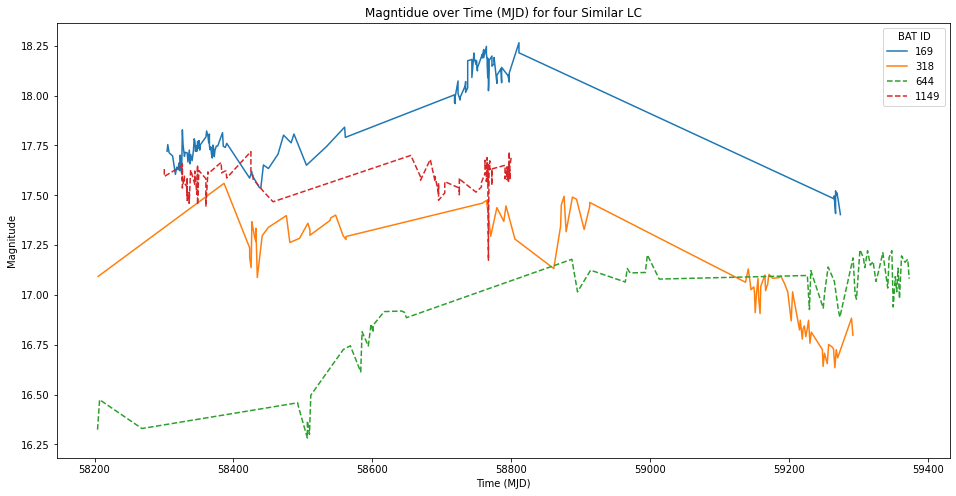

In [49]:
plot_lc(similar_short_agn, 'Magntidue over Time (MJD) for four Similar LC')

#### Identify NaN Chi-Sq Fits

In [78]:
# count how many chisq are nan for drw and dho
drw_nan = 0
dho_nan = 0

dho_fit = 0

for index, row in agn_fit_data.iterrows():    
    if np.isnan(row['Chi-sq DRW Fit']):
        drw_nan += 1
    elif np.isnan(row['Chi-sq DHO Fit']):
        dho_nan += 1
        
        if row['Best Fit'] == 'DHO':
            dho_fit += 1
    else:
        continue
        
print('drw nan = ' + str(drw_nan))
print('dho nan = ' + str(dho_nan))
print('dho nan fits = ' + str(dho_fit))

drw nan = 0
dho nan = 81
dho nan fits = 81


In [80]:
# make dataframe of NaN chi-sq DHO
# initialize columns
bat_ids = []
times = []
mags = []
mag_errs = []
best_fits = []
logbols = []
snrs = []
lc_lengths = []

for index, row in agn_fit_data.iterrows():
    if np.isnan(row['Chi-sq DHO Fit']):
        bat_ids.append(row['BAT ID'])
        times.append(row['Times (MJD)'])
        mags.append(row['Magnitudes'])
        mag_errs.append(row['Mag Errors'])
        best_fits.append(row['Best Fit'])
        logbols.append(row['logLbol'])
        snrs.append(row['SNR'])
        lc_lengths.append(row['LC Length'])  

nan_dho_data = pd.DataFrame({'BAT ID': bat_ids, 'Times (MJD)': times, 'Magnitudes': mags, 'Mag Errors': mag_errs,
                            'Best Fit': best_fits, 'logLbol': logbols, 'SNR': snrs, 'LC Length': lc_lengths})
len(nan_dho_data)

81

#### Plots of NaN Chi-Sq DHO

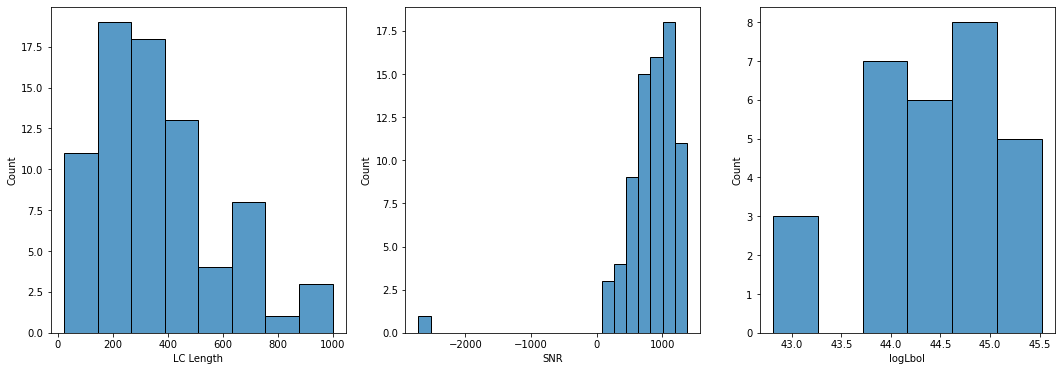

In [92]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# histogram of LC Length for nan_dho_data
sns.histplot(data=nan_dho_data, x='LC Length', ax=axs[0])

# histogram of SNR for nan_dho_data
sns.histplot(data=nan_dho_data, x='SNR', ax=axs[1])

# histogram of LC Length for nan_dho_data
sns.histplot(data=nan_dho_data, x='logLbol', ax=axs[2])

plt.show()

#### DHO Chi-sq NaN compared to Real Values

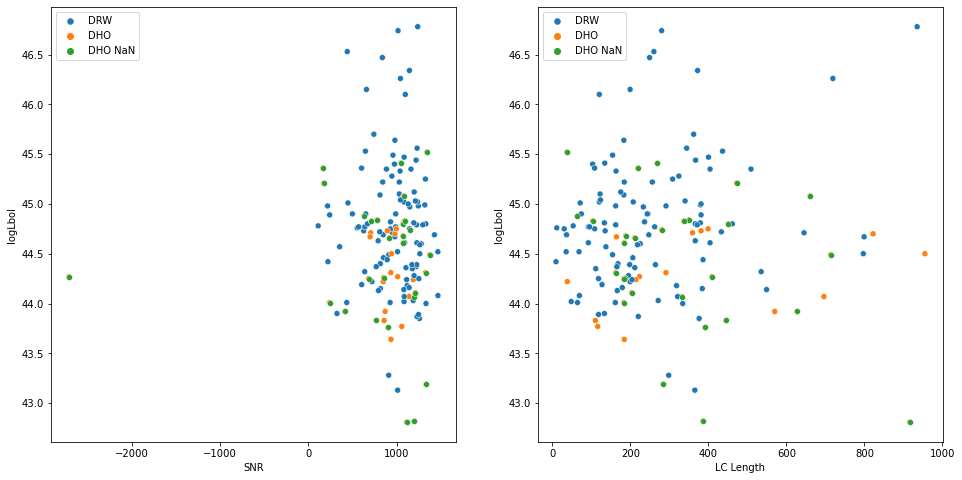

In [116]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# SNR vs LBol
sns.scatterplot(data=agn_fit_data, x='SNR', y ='logLbol', hue='Best Fit', ax=axs[0])
sns.scatterplot(data=nan_dho_data, x='SNR', y ='logLbol', color=['C2'], ax=axs[0])
axs[0].legend(labels=['DRW', 'DHO', 'DHO NaN'])
leg = axs[0].get_legend()
leg.legendHandles[0].set_color('C0')
leg.legendHandles[1].set_color('C1')
leg.legendHandles[2].set_color('C2')

# LC Length vs LBol
sns.scatterplot(data=agn_fit_data, x='LC Length', y ='logLbol', hue='Best Fit', ax=axs[1])
sns.scatterplot(data=nan_dho_data, x='LC Length', y ='logLbol', color=['C2'], ax=axs[1])
axs[1].legend(labels=['DRW', 'DHO', 'DHO NaN'])
leg = axs[1].get_legend()
leg.legendHandles[0].set_color('C0')
leg.legendHandles[1].set_color('C1')
leg.legendHandles[2].set_color('C2')

plt.show()

#### Dataframe Without NaN DHO's

In [122]:
# initialize columns
bat_ids = []
times = []
mags = []
mag_errs = []
chisq_drws = []
chisq_dhos = []
best_fits = []
logbols = []
snrs = []
lc_lengths = []

# grab data from each row
for index, row in agn_fit_data.iterrows():
    if np.isnan(row['Chi-sq DHO Fit']):
        continue
        
    bat_ids.append(row['BAT ID'])
    times.append(row['Times (MJD)'])
    mags.append(row['Magnitudes'])
    mag_errs.append(row['Mag Errors'])
    chisq_drws.append(row['Chi-sq DRW Fit'])
    chisq_dhos.append(row['Chi-sq DHO Fit'])
    best_fits.append(row['Best Fit'])
    logbols.append(row['logLbol'])
    snrs.append(row['SNR'])
    lc_lengths.append(row['LC Length'])

# return new dataframe
good_agn_data = pd.DataFrame({'BAT ID': bat_ids, 'Times (MJD)': times, 'Magnitudes': mags, 'Mag Errors': mag_errs,
                            'Chi-sq DRW Fit': chisq_drws, 'Chi-sq DHO Fit': chisq_dhos, 'Best Fit': best_fits,
                            'logLbol': logbols, 'SNR': snrs, 'LC Length': lc_lengths})

#### Plots of Good Data
Plots with LC containing NaN Chi-sq DHO Fit's removed

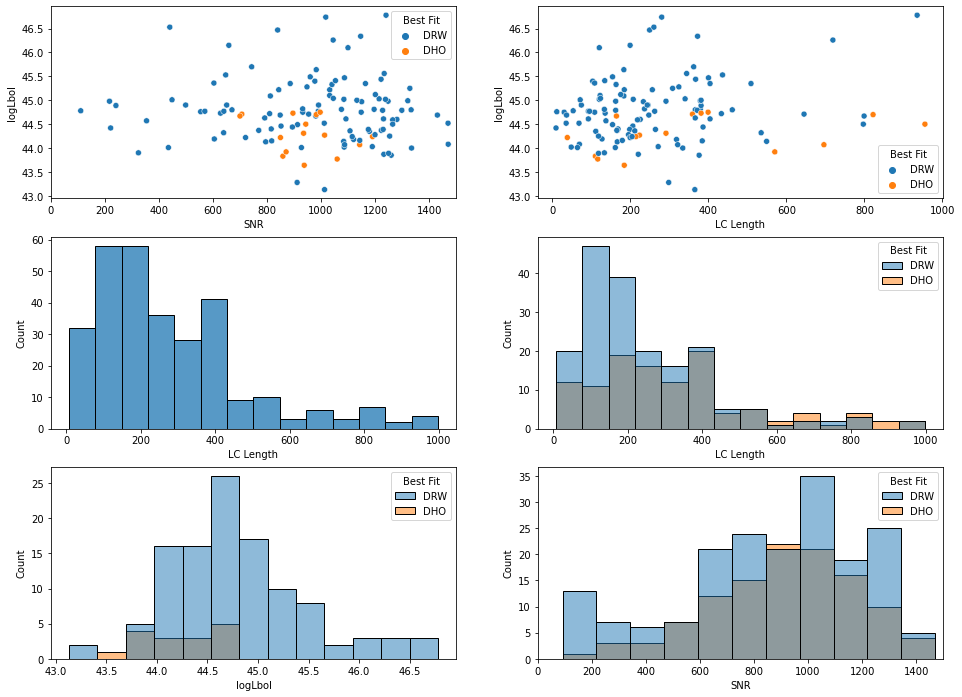

In [128]:
fig, axs = plt.subplots(3, 2, figsize=(16, 12))

#######
# row 0
#######
row = 0

# SNR vs LBol
sns.scatterplot(data=good_agn_data, x='SNR', y ='logLbol', hue='Best Fit', ax=axs[row,0])
axs[row, 0].set_xlim(0, 1500) 
# note: there are some outliers

# LC Length vs LBol
sns.scatterplot(data=good_agn_data, x='LC Length', y ='logLbol', hue='Best Fit', ax=axs[row,1])

#######
# row 1
#######
row += 1

# histogram of LC Length
sns.histplot(data=good_agn_data, x='LC Length', ax=axs[row,0])

# histogram of LC Length for best fit
sns.histplot(data=good_agn_data, x='LC Length', hue='Best Fit', ax=axs[row,1])

#######
# row 2
#######
row += 1

# histogram of LBol for best fit
sns.histplot(data=good_agn_data, x='logLbol', hue='Best Fit', ax=axs[row,0])

# histogram of SNR for best fit
sns.histplot(data=good_agn_data, x='SNR', hue='Best Fit', ax=axs[row,1])
axs[row, 1].set_xlim(0, 1500) 
# note: there are some outliers

plt.savefig('plots_fixed.png')
plt.show()

### 2.3 Shortest Light Curves
Light curves of length < 20

In [131]:
# dataframe of notably short light curves to look at
shortest_agn_curves = get_curves_of_max_value(agn_fit_data, 'LC Length', 50)
shortest_agn_curves

,BAT ID,Times (MJD),Magnitudes,Mag Errors,Chi-sq DRW Fit,Chi-sq DHO Fit,Best Fit,logLbol,SNR,LC Length
0,18,[58292.4545023 58312.4678819 58314.4668056 583...,[21.5398254 21.3304901 21.5236073 21.2296791 2...,[0.23370814 0.21958768 0.23261416 0.21278751 0...,1.408171e+01,0.005479,DHO,NaN,92.268836,27.0
1,55,[58436.2492708 58443.3073148 58766.3720718 590...,[16.6830597 17.4163628 17.2387848 17.161705 1...,[0.0177387 0.02463482 0.02249173 0.02166811 0...,3.531371e-06,1.290937,DRW,NaN,784.028692,24.0
2,119,[58340.4990394 58373.4279051 58383.4751273 584...,[20.9576988 21.4786701 21.9123707 21.4694214 2...,[0.16898823 0.2045275 0.23411345 0.20389664 0...,5.519431e-02,3.762700,DRW,NaN,101.684826,7.0
3,127,[59092.4560532 59129.3788194 59149.2851736 591...,[16.7190876 16.6395721 16.4415245 16.5804787 1...,[0.03127416 0.03046914 0.02864798 0.02989946 0...,1.850929e+00,7.229609,DRW,44.76,554.717961,11.0
4,185,[58384.3999653 58390.4113657 58430.3458565 584...,[16.4878254 16.4156837 16.4510002 16.502367 1...,[0.01534752 0.01497939 0.01515648 0.01542479 0...,5.157274e-01,3.115688,DRW,NaN,1071.118064,30.0
5,213,[58384.401331 58390.4194676 58427.375 584...,[15.168395 15.1795645 15.0950317 15.1628284 1...,[0.01030814 0.01031311 0.01028143 0.01030575 0...,3.269350e-07,16.878631,DRW,44.52,1469.103396,35.0
6,226,[58362.5162269 58384.381331 58388.4273843 584...,[14.8422098 14.8939762 14.8521233 14.7790194 1...,[0.01365955 0.01369418 0.013666 0.01362034 0...,2.697412e-04,11.164636,DRW,44.02,1085.260453,48.0
7,249,[58371.5227662 58379.4780671 58388.4160417 583...,[19.7111645 19.9988213 19.8551559 20.1552372 1...,[0.07831687 0.09506273 0.08636401 0.10522974 0...,1.072413e+02,19.787960,DHO,NaN,222.574315,40.0
8,266,[58384.4233218 58427.3727199 58430.3562153 584...,[14.0877094 13.9517012 14.057704 14.117178 1...,[0.01058259 0.01056217 0.01057739 0.01058809 0...,2.942624e-09,NaN,DHO,45.52,1345.366200,37.0
9,436,[58749.4978472 58749.4982986 58767.4454745 587...,[14.0005159 13.9675722 13.8637705 13.8863335 1...,[0.01211243 0.01212692 0.0121778 0.01216609 0...,6.374504e+01,0.730059,DHO,NaN,1145.157728,23.0


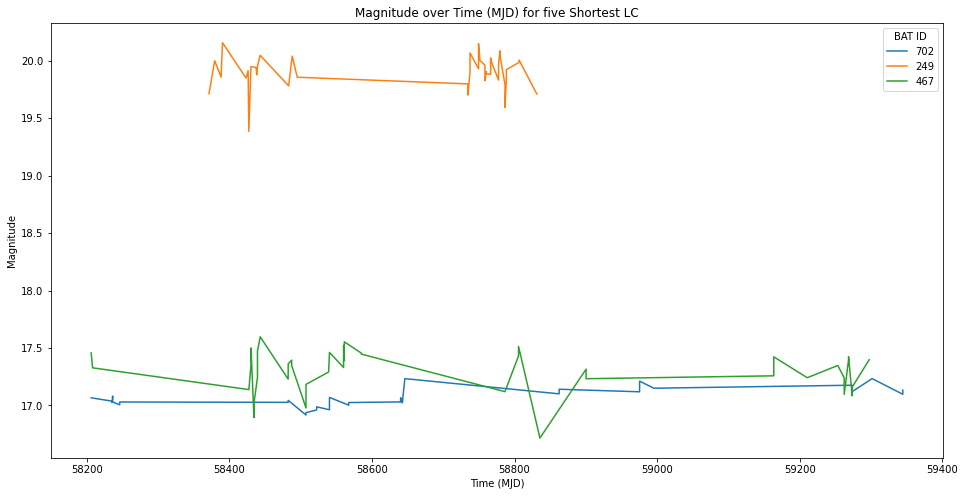

<AxesSubplot:title={'center':'Magnitude over Time (MJD) for five Shortest LC'}, xlabel='Time (MJD)', ylabel='Magnitude'>

In [132]:
plot_lc(shortest_agn_curves.sort_values(by=['LC Length'])[20:23], 'Magnitude over Time (MJD) for five Shortest LC')

### 2.4 Low SNR
Light curves of SNR < 200

In [32]:
low_snr_agn_curves = get_curves_of_max_value(agn_fit_data, 'SNR', 200)
#low_snr_agn_curves

#### Histogram

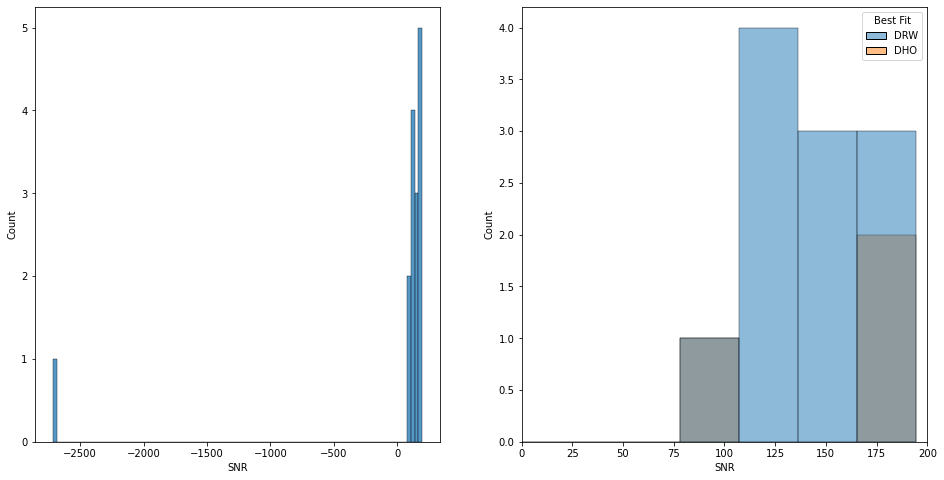

In [39]:
# light curves of length < 150
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

num_bins = 100

# histogram of LC Length
sns.histplot(data=low_snr_agn_curves, x='SNR', bins=num_bins, ax=axs[0])

# histogram of LC Length for best fit
sns.histplot(data=low_snr_agn_curves, x='SNR', hue='Best Fit', bins=num_bins, ax=axs[1])
axs[1].set_xlim(0, 200)

plt.show()

#### Plots of LC for all Low SNR AGN

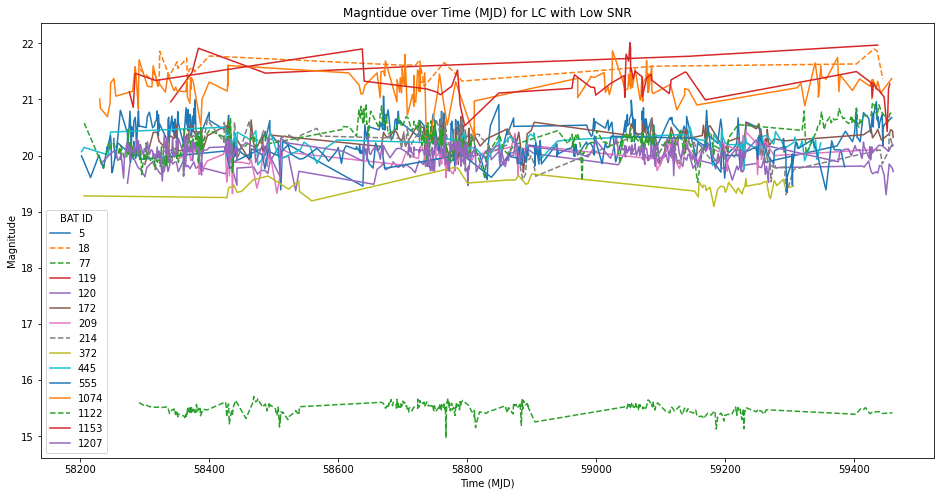

In [42]:
plot_lc(low_snr_agn_curves, 'Magntidue over Time (MJD) for LC with Low SNR', bf_line=True)

#### Plot Negative SNR Curve

BAT ID = 77
LC Length = 409.0
Best Fit = DHO
logLbol = 44.27
SNR = -2714.513755245218


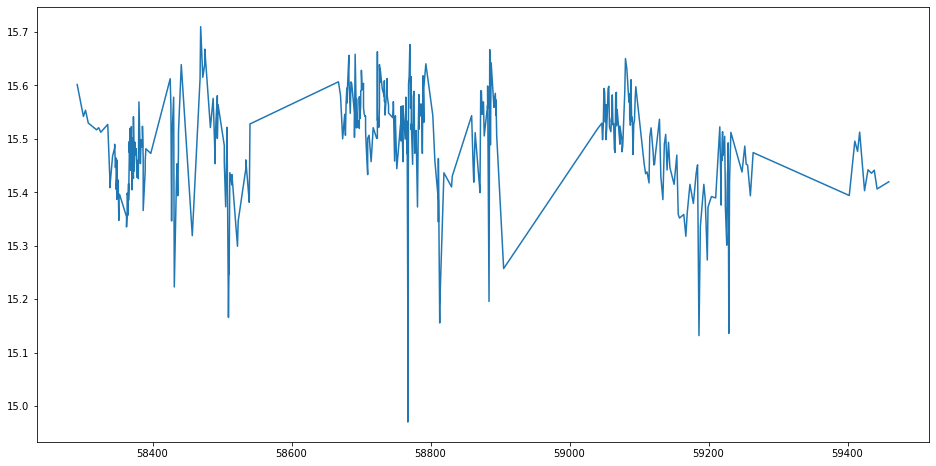

In [36]:
index = 2
row = low_snr_agn_curves.iloc[index]

# grab light curve data
times = convert_to_float_list(row['Times (MJD)'])
y = convert_to_float_list(row['Magnitudes'])

# check if lists are good
if y == flag or times == flag:
    raise Exception('Magnitude or Times are not in a valid format')

fig = plt.figure(figsize=(16, 8))
plt.plot(times, y)

print('BAT ID = ' + str(row['BAT ID']))
print('LC Length = ' + str(row['LC Length']))
print('Best Fit = ' + str(row['Best Fit']))
print('logLbol = ' + str(row['logLbol']))
print('SNR = ' + str(row['SNR']))

plt.show()

#### Plot Lowest (positive) SNR

BAT ID = 18
LC Length = 27.0
Best Fit = DHO
logLbol = nan
SNR = 92.26883648073448


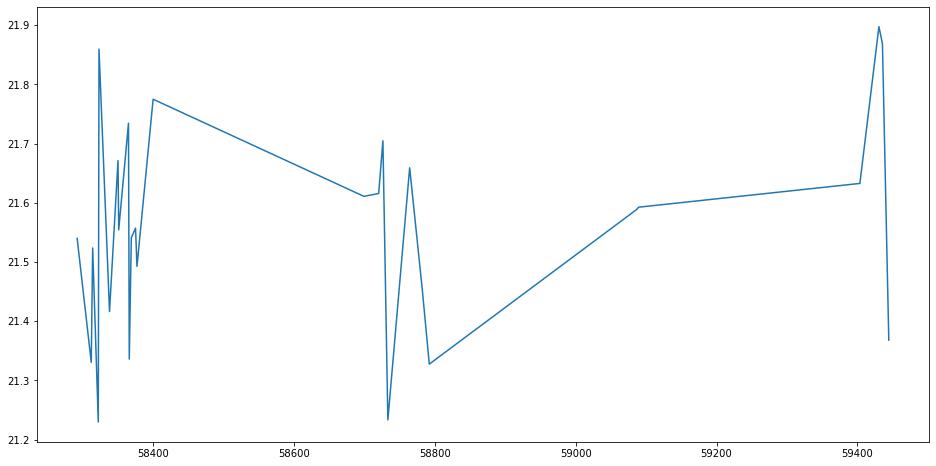

In [44]:
index = 1
row = low_snr_agn_curves.iloc[index]

# grab light curve data
times = convert_to_float_list(row['Times (MJD)'])
y = convert_to_float_list(row['Magnitudes'])

# check if lists are good
if y == flag or times == flag:
    raise Exception('Magnitude or Times are not in a valid format')

fig = plt.figure(figsize=(16, 8))
plt.plot(times, y)

print('BAT ID = ' + str(row['BAT ID']))
print('LC Length = ' + str(row['LC Length']))
print('Best Fit = ' + str(row['Best Fit']))
print('logLbol = ' + str(row['logLbol']))
print('SNR = ' + str(row['SNR']))

plt.show()

- - - 
- - -

## Chapter 3: Case for NaN's
The goal for this chapter is to find the reason NaN Chi-sq fits were produced for many of the DHO fits

### 3.1 Identifying NaN Chi-sq Fits
We would like to identify and take note of all of the NaN Chi-sq DHO fits. We have already written code in 2.2 to identify such fits. Thus the code will be reused (with some modification) in the following section

#### List of BAT IDs with NaN Chi-sq DHO Fits

In [37]:
# list of BAT ids for all LC with NaN for Chi-sq DHO Fit 
nan_fits = []

# mask EXCLUDING all NaN fits
nan_fits_mask = []

for index, row in agn_fit_data.iterrows():    
    is_nan = np.isnan(row['Chi-sq DHO Fit'])
    
    # add to mask
    nan_fits_mask.append(not is_nan)
    
    # note BAT ID
    if is_nan:
        nan_fits.append(row['BAT ID'])

print(nan_fits)

[7, 29, 51, 61, 77, 106, 151, 157, 162, 183, 214, 237, 265, 266, 285, 291, 303, 308, 337, 347, 353, 382, 383, 394, 400, 416, 428, 429, 432, 434, 443, 446, 460, 461, 463, 467, 483, 486, 519, 542, 554, 568, 576, 579, 580, 585, 587, 588, 591, 592, 595, 607, 632, 638, 644, 648, 651, 674, 684, 686, 716, 737, 738, 772, 783, 811, 817, 828, 876, 883, 1037, 1049, 1112, 1117, 1122, 1149, 1151, 1167, 1186, 1196, 1198]


#### Mask Dataframe

In [38]:
# gives dataframe of LC with only NaN Chi-sq DHO Fits
# agn_fit_data[np.logical_not(nan_fits_mask)]

# gives dataframe EXCLUDING NaN Chi-sq DHO Fits
# agn_fit_data[nan_fits_mask]

### 3.2 Case Study: BAT ID 7 (NaN Fit)
BAT ID 7 is a LC that has a NaN Chi-sq DHO Fit. In this section, we search for a possible cause. BAT 7 has 177 datapoints

In [8]:
# read in LC
lc_7 = pd.read_csv('data/2.2982_-0.6152_ztfg.parquet')

#### Plot LC

In [24]:
# plot_lc(agn_fit_data.loc[agn_fit_data['BAT ID'] == 7], 'Light curve of BAT 7')

#### DHO Process

In [9]:
# run DHO process on LC
best_dho, sim_lc, chisq_dho = dho_process(lc_7)

Running burn-in...
Running production...
Done


In [10]:
print(f'Best DHO: {best_dho}')
print(f'Chi-sq DHO: {chisq_dho}')

Best DHO: [727.31952175  17.26202878  11.0982245    3.50802644]
Chi-sq DHO: inf


In [11]:
print(f'dho_lc_y: {sim_lc[1]}')

dho_lc_y: [18.12675846         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan 18.10906975         nan 18.01341022 18.12830767
         nan         nan         nan         nan         nan         nan
         nan 18.22375091         nan 18.15487328 18.22572941         nan
 18.17494675 18.15006275         nan         nan         nan         nan
         nan         nan 17.97354665         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan 18.19932302
         nan         nan         nan         nan         nan         nan
         nan         nan 18.17781651 18.19250067         nan         nan
         nan         nan         nan         nan 18.10149993 18.15216499
         nan         nan         nan 18.30060176 18.30660131 18.31368006
         nan 18.21805288 18.21921638 18.2

### 3.3 Case Study: BAT ID 542 (NaN Fit)
BAT ID 542 is a LC that has a NaN Chi-sq DHO Fit. In this section, we search for a possible cause. BAT 542 has 391 datapoints

In [17]:
# read in LC
lc_542 = pd.read_csv('data/171.4007_54.3825_ztfg.parquet')

#### Plot LC

In [23]:
# plot_lc(agn_fit_data.loc[agn_fit_data['BAT ID'] == 542], 'Light curve of BAT 542')

#### DHO Process

In [8]:
# run DHO process on LC
best_dho, sim_lc, chisq_dho = dho_process(lc_542)

Running burn-in...
Running production...
Done


In [9]:
print(f'Best DHO: {best_dho}')
print(f'Chi-sq DHO: {chisq_dho}')

Best DHO: [172.40019118   4.6397263    6.96167324   0.6083268 ]
Chi-sq DHO: inf


In [11]:
# note: includes NaN's and inf in list
# print(f'dho_lc_y: {sim_lc[1]}')

### 3.4 Case Study: BAT ID 739 (Real Fit)
BAT ID 739 is a LC that has a real number for Chi-sq DHO Fit. In this section, we search for a possible cause. BAT 739 has 99 datapoints

In [4]:
# read in LC
lc_739 = pd.read_csv('data/220.5997_-17.2532_ztfg.parquet')

#### Plot LC

In [22]:
# plot_lc(agn_fit_data.loc[agn_fit_data['BAT ID'] == 739], 'Light curve of BAT 739')

#### DHO Process

In [5]:
# run DHO process on LC
best_dho, sim_lc, chisq_dho = dho_process(lc_739)

Running burn-in...
Running production...
Done


C:\Users\caleb\anaconda3\lib\site-packages\celerite\celerite.py:467: RuntimeWarning: underflow encountered in multiply
  var = -np.sum(KxsT * self.apply_inverse(KxsT), axis=0)


In [6]:
print(f'Best DHO: {best_dho}')
print(f'Chi-sq DHO: {chisq_dho}')

Best DHO: [7.53933934e-01 3.59317158e+02 1.11392721e-04 1.94267934e-01]
Chi-sq DHO: 2.4891599236687036


In [7]:
print(f'dho_lc_y: {sim_lc[1]}')

dho_lc_y: [14.77239327 14.93068639 15.31276231 15.33045817 15.31546499 15.27125103
 15.20598964 15.05015329 15.23911723 15.26853525 15.27987318 15.31801754
 15.33479872 15.07130858 15.22503235 15.17825752 15.22693256 15.30833092
 15.33044266 14.8287529  14.82916518 15.32421719 14.98600627 15.27571986
 15.29290133 15.23242615 15.24420819 15.24836204 15.30688157 15.22180212
 15.16184835 15.33447688 15.47468557 15.59133786 14.85519899 15.28275961
 15.29380695 15.07336721 15.33263782 15.33501904 15.28699328 15.06510946
 15.30031662 15.25031946 15.3234679  15.29953458 15.35674715 15.36878762
 15.17107511 15.28983674 14.85128979 15.24343047 15.26788239 15.22950436
 15.27737134 15.2522776  15.03998825 15.28555028 15.02535234 15.21200161
 15.23156625 15.0341844  15.10350076 15.20633678 15.25048745 15.13240091
 15.01165465 14.83061615 15.17352215 15.24334468 15.01439703 15.22036142
 15.33384383 15.23223854 15.26224649 15.25974198 15.07952457 15.16562521
 15.19460958 15.16565294 15.24268116 15.2

### 3.5 Case Study: BAT ID 841 (Real Fit)
BAT ID 841 is a LC that has a real number for Chi-sq DHO Fit. In this section, we search for a possible cause. BAT 841 has 223 datapoints

In [5]:
# read in LC
lc_841 = pd.read_csv('data/253.2454_2.4009_ztfg.parquet')

#### Plot LC

In [43]:
# plot_lc(agn_fit_data.loc[agn_fit_data['BAT ID'] == 841], 'Light curve of BAT 841')

#### DHO Process

In [9]:
# run DHO process on LC
best_dho, sim_lc, chisq_dho = dho_process(lc_841)

Running burn-in...
Running production...
Done


In [10]:
print(f'Best DHO: {best_dho}')
print(f'Chi-sq DHO: {chisq_dho}')

Best DHO: [3211.57847788  725.91505384  207.40168976    8.15421624]
Chi-sq DHO: 0.9836466817665981


In [16]:
print(f'dho_lc_y: {sim_lc[1]}')

dho_lc_y: [17.45601186         nan 17.59851549         nan 17.52219405         nan
         nan 17.41211025         nan         nan 17.29767677         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan 17.40898019         nan
         nan         nan 17.49470934         nan         nan 17.692065
         nan        -inf 17.37114347         nan         nan         nan
         nan 17.24804042         nan         nan         nan 17.63786287
         nan         nan 17.52115281         nan         nan 17.53266821
         nan         nan 17.48404007         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan       

### 3.5 Deeper Analysis
Two observations can be made:
1. NaN fits include +inf in sim_lc
2. NaN fits mag_intial > mag_final

#### LC Plots of Case Studies

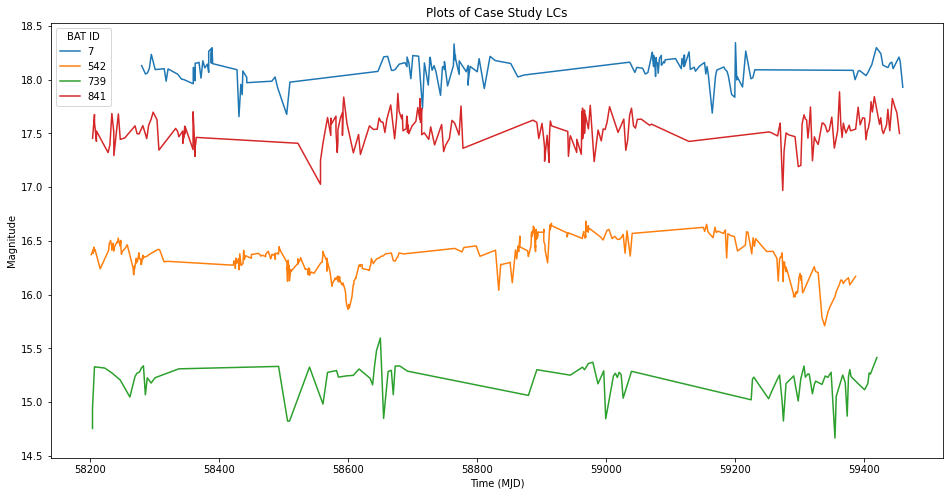

<AxesSubplot:title={'center':'Plots of Case Study LCs'}, xlabel='Time (MJD)', ylabel='Magnitude'>

In [16]:
# mask of BAT IDs used in case studies
m7 = agn_fit_data['BAT ID'] == 7
m542 = agn_fit_data['BAT ID'] == 542
m739 = agn_fit_data['BAT ID'] == 739
m841 = agn_fit_data['BAT ID'] == 841

plot_lc(agn_fit_data[m7 | m542 | m739 | m841], 'Plots of Case Study LCs')
# NaN: 7, 542
# Good: 739, 841

#### Rereun DHO Process for *All* LC

In [ ]:
# read in files

# run dho process for each file

# save chisq, y and sim_lc for each file

# flag lc with y_intial > y_final
# want to see if any real chisq pass

# flag sim_lc without +inf
# want to see if any real chisq include +inf


- - - 

## Appendix A: Functions

#### convert_to_float_list()

In [5]:
flag = [float('inf')]

# Converts a string into a float list.
# String must be in the following format:
# '[1.01, 2.02, 3.03, 4.04]'
# Returns an array of len=1 with the one index='inf' if the String
# cannont be converted into a list of floats
def convert_to_float_list(str_list):
    str_list = str_list.replace('[', '')
    str_list = str_list.replace(']', '')
    
    try:
        return [float(i) for i in str_list.split()]
    except ValueError:
        return flag

#### get_curves_of_ids()

In [30]:
# create dataframe of light curves given a list of their BAT ids
def get_curves_of_ids(df, ids):
    # initialize columns
    bat_ids = []
    times = []
    mags = []
    mag_errs = []
    chisq_drws = []
    chisq_dhos = []
    best_fits = []
    logbols = []
    snrs = []
    lc_lengths = []
        
    # grab data from each row
    for index, row in agn_fit_data.iterrows():
        if row['BAT ID'] in ids:
            bat_ids.append(row['BAT ID'])
            times.append(row['Times (MJD)'])
            mags.append(row['Magnitudes'])
            mag_errs.append(row['Mag Errors'])
            chisq_drws.append(row['Chi-sq DRW Fit'])
            chisq_dhos.append(row['Chi-sq DHO Fit'])
            best_fits.append(row['Best Fit'])
            logbols.append(row['logLbol'])
            snrs.append(row['SNR'])
            lc_lengths.append(row['LC Length'])
            
    # return new dataframe
    return pd.DataFrame({'BAT ID': bat_ids, 'Times (MJD)': times, 'Magnitudes': mags, 'Mag Errors': mag_errs,
                                'Chi-sq DRW Fit': chisq_drws, 'Chi-sq DHO Fit': chisq_dhos, 'Best Fit': best_fits,
                                'logLbol': logbols, 'SNR': snrs, 'LC Length': lc_lengths})

#### get_curves_of_max_value()

In [29]:
# create dataframe of light curves with length < max_length from a given dataframe
def get_curves_of_max_value(df, key, max_length):
    # initialize columns
    bat_ids = []
    times = []
    mags = []
    mag_errs = []
    chisq_drws = []
    chisq_dhos = []
    best_fits = []
    logbols = []
    snrs = []
    lc_lengths = []
        
    # grab data from each row
    for index, row in agn_fit_data.iterrows():
        if row[key] < max_length:
            bat_ids.append(row['BAT ID'])
            times.append(row['Times (MJD)'])
            mags.append(row['Magnitudes'])
            mag_errs.append(row['Mag Errors'])
            chisq_drws.append(row['Chi-sq DRW Fit'])
            chisq_dhos.append(row['Chi-sq DHO Fit'])
            best_fits.append(row['Best Fit'])
            logbols.append(row['logLbol'])
            snrs.append(row['SNR'])
            lc_lengths.append(row['LC Length'])
            
    # return new dataframe
    return pd.DataFrame({'BAT ID': bat_ids, 'Times (MJD)': times, 'Magnitudes': mags, 'Mag Errors': mag_errs,
                                'Chi-sq DRW Fit': chisq_drws, 'Chi-sq DHO Fit': chisq_dhos, 'Best Fit': best_fits,
                                'logLbol': logbols, 'SNR': snrs, 'LC Length': lc_lengths})

#### plot_lc

In [3]:
# given a dataframe and a title for the plot, plots all LC in dataframe
def plot_lc(df, title, **kwargs):
    bf_line = kwargs.get('bf_line', False)
    show = kwargs.get('show', True)
    wd = kwargs.get('wd', 16)
    ht = kwargs.get('ht', 8)
    
    fig, ax = plt.subplots(figsize=(wd, ht))      

    for index, row in df.iterrows():
        # grab light curve data
        times = convert_to_float_list(row['Times (MJD)'])
        y = convert_to_float_list(row['Magnitudes'])

        # check if lists are good
        if y == flag or times == flag:
            raise Exception('Magnitude or Times are not in a valid format')

        # change line style based on 'Best Fit'
        line_style = '-'
        if bf_line and row['Best Fit'] == 'DHO':
            line_style = '--'

        # add agn to LC plot
        plt.plot(times, y, line_style)
        
    # add labels to plot
    ax.set_title(title)
    plt.xlabel('Time (MJD)')
    plt.ylabel('Magnitude')
    ax.legend(df['BAT ID'], title='BAT ID')
    
    if show:
        plt.show()
    
    return ax

#### dho_process

In [3]:
# runs a DHO process on a given LC

################
# DHO imports
################
import emcee

from eztao.ts import neg_param_ll, dho_fit, carma_sim
from eztao.carma import DHO_term

from celerite import GP

################
# Function
################

def dho_process(df):
    # get necessary values from dataframe
    t = df['mjd'].values
    y = df['mag']
    yerr = yerr=df['magerr']

    ################
    # DHO Process
    ################

    # obtain best-fit
    best_dho = dho_fit(t, y, yerr)

    # define celerite GP model
    dho_gp = GP(DHO_term(*np.log(best_dho)), mean=np.median(y))
    dho_gp.compute(t, yerr)

    # define log prob function
    def param_ll(*args):
        return -neg_param_ll(*args)

    # initialize the walker, specify number of walkers, prob function, args and etc.
    initial = np.array(np.log(best_dho))
    ndim, nwalkers = len(initial), 32
    sampler_dho = emcee.EnsembleSampler(nwalkers, ndim, param_ll, args=[y, dho_gp])

    # run a burn-in surrounding the best-fit parameters obtained above
    print('Running burn-in...')
    p0 = initial + 1e-8 * np.random.randn(nwalkers, ndim)
    p0, lp, _ = sampler_dho.run_mcmc(p0, 500)

    # clear up the stored chain from burn-in, rerun the MCMC
    print('Running production...')
    sampler_dho.reset()
    sampler_dho.run_mcmc(p0, 2000);

    # remove points with low prob for the sake of making good corner plot
    prob_threshold_dho = np.percentile(sampler_dho.flatlnprobability, 3)
    clean_chain_dho = sampler_dho.flatchain[sampler_dho.flatlnprobability > prob_threshold_dho, :]

    ################
    # Chi-sq
    ################

    def chisqg(y_data, y_model, sd=None):
        chisq = np.nansum(((y_data-y_model)/sd)**2)
        return chisq

    # Create simulated light curves
    dho_lc_t, dho_lc_y, dho_lc_yerr = carma_sim.pred_lc(t, y, yerr, best_dho, 2, t)
    sim_lc = [dho_lc_t, dho_lc_y, dho_lc_yerr]
    
    # Chi Squared
    chisq_dho = chisqg(y, dho_lc_y, yerr)
    
    print('Done')    
    return best_dho, sim_lc, chisq_dho